In [1]:
import pandas as pd
import plotly.express as px
from datetime import datetime
import plotly.io as pio
import seaborn as sns
pio.renderers.default='notebook'
# pio.kaleido.scope.mathjax = None
import matplotlib.pyplot as plt
import matplotlib.ticker as tick


### Читаем из файла и формируем датасет

In [2]:
sh_names=['tochka1','tochka2','tochka3','ozon','wb','yamarket','site']
url=r'.\Задание Продуктовый аналитик копия.xlsx'


def read_excel(url, name):
    t=pd.read_excel(url, sheet_name=name,skiprows=2).assign(source=name)
    print(t['Дата'].min(), t['Дата'].max())
    return t

df_lst=[]
for i in sh_names:
    df_lst.append(read_excel(url,i))

# t1=read_excel(url, sh_names[0])
# t2=read_excel(url, sh_names[1])
# t3=read_excel(url, sh_names[2]) 

df=pd.concat(df_lst)
df=df.replace({'CPU-CU9':'CPU-CU9-2023', 'TB-AMPro-':'TB-AMPro-2023','Внешний жесткий диск 1TB':'Внешний жесткий диск StoragePlus 1TB','Игровой монитор 32" 4K':'Игровой монитор 32" 4K GamerVision'})
df.head()
   


# prod=pd.read_excel(r'B:\analyt_obuch\test_zadanie_rabota\ДРУГИЕ\Совкомбанкк\Задание Продуктовый аналитик (1).xlsx', sheet_name="Продажи в точках")
# prod

2024-10-01 00:00:00 2024-12-31 00:00:00
2024-10-01 00:00:00 2024-12-30 00:00:00
2024-10-01 00:00:00 2024-12-30 00:00:00
2024-10-01 00:00:00 2024-12-31 00:00:00
2024-10-01 00:00:00 2024-12-31 00:00:00
2024-10-02 00:00:00 2024-12-31 00:00:00
2024-10-01 00:00:00 2024-12-31 00:00:00


Дата     Время  Количество ID клиента  Цена (RUB)  \
0 2024-10-01  14:35:00           2       1035       54890   
1 2024-10-02  11:20:00           1       1018       98890   
2 2024-10-03  16:50:00           3       1046       38390   
3 2024-10-04  09:15:00           5       1027       21890   
4 2024-10-05  18:40:00           8       1059       16390   

   Сумма покупки (RUB)           Название товара        Артикул   source  \
0               109780              Смартфон X10    SM-X10-2023  tochka1   
1                98890  Ноутбук UltraBook Pro 14  NB-UBP14-2023  tochka1   
2               115170      Планшет TabMaster 10   TB-TM10-2023  tochka1   
3               109450   Умные часы SmartWatch 3    SW-SW3-2023  tochka1   
4               131120  Наушники NoiseCancel Pro    HP-NCP-2023  tochka1   

  Доставка за счет  Стоимость доставки  
0              NaN                 NaN  
1              NaN                 NaN  
2              NaN                 NaN  
3              NaN                 NaN  
4              NaN                 NaN

In [3]:
dem=pd.read_excel(url,sheet_name='CRM', skiprows=1)
seb=pd.read_excel(url,sheet_name='cat_net_price', skiprows=1)
cat_pr=pd.read_excel(url, sheet_name='cat_price',skiprows=1)
# print(seb.nunique())
df=df.merge(dem, how='left', on='ID клиента').merge(cat_pr[['Название товара','Артикул','Цена (RUB)']], how='left',on=['Название товара','Артикул']).merge(seb[['Название товара','Артикул','Себестоимость (RUB)']],how='left', on=['Название товара','Артикул'])
df['Сумма покупки']=df['Количество']*df['Цена (RUB)_y']
df['Маржа']=df['Количество']*df['Цена (RUB)_y']-df['Себестоимость (RUB)']
df['возраст']=(df['Дата'].dt.year-df['Дата рождения'].dt.year).fillna(0).astype(int)
df['возраст_']=pd.cut(df['возраст'], bins=7, labels=['не_опр','18-','18-24','25-34','35-44','45-54','55+'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Дата                 707 non-null    datetime64[ns]
 1   Время                707 non-null    object        
 2   Количество           707 non-null    int64         
 3   ID клиента           404 non-null    object        
 4   Цена (RUB)_x         707 non-null    int64         
 5   Сумма покупки (RUB)  707 non-null    int64         
 6   Название товара      707 non-null    object        
 7   Артикул              707 non-null    object        
 8   source               707 non-null    object        
 9   Доставка за счет     101 non-null    object        
 10  Стоимость доставки   101 non-null    float64       
 11  Дата рождения        373 non-null    datetime64[ns]
 12  Пол                  373 non-null    object        
 13  Цена (RUB)_y         707 non-null  

Дата     Время  Количество ID клиента  Цена (RUB)_x  \
0 2024-10-01  14:35:00           2       1035         54890   
1 2024-10-02  11:20:00           1       1018         98890   
2 2024-10-03  16:50:00           3       1046         38390   
3 2024-10-04  09:15:00           5       1027         21890   
4 2024-10-05  18:40:00           8       1059         16390   

   Сумма покупки (RUB)           Название товара        Артикул   source  \
0               109780              Смартфон X10    SM-X10-2023  tochka1   
1                98890  Ноутбук UltraBook Pro 14  NB-UBP14-2023  tochka1   
2               115170      Планшет TabMaster 10   TB-TM10-2023  tochka1   
3               109450   Умные часы SmartWatch 3    SW-SW3-2023  tochka1   
4               131120  Наушники NoiseCancel Pro    HP-NCP-2023  tochka1   

  Доставка за счет  Стоимость доставки Дата рождения Пол  Цена (RUB)_y  \
0              NaN                 NaN    1970-03-03   М         54890   
1              NaN                 NaN    1980-08-14   Ж         98890   
2              NaN                 NaN    1998-07-04   Ж         38390   
3              NaN                 NaN    1994-12-12   М         21890   
4              NaN                 NaN    1979-01-01   М         16390   

   Себестоимость (RUB)  Сумма покупки   Маржа  возраст возраст_  
0                35200         109780   74580       54    45-54  
1                60500          98890   38390       44    35-44  
2                24200         115170   90970       26    18-24  
3                13200         109450   96250       30    25-34  
4                 8800         131120  122320       45    35-44

In [4]:
# df.nunique()
# df[df["Себестоимость (RUB)"].isnull()]

In [5]:
sobytiya=pd.read_excel(url, sheet_name='sobytiya', skiprows=1)
sobytiya.values#.loc[sobytiya['Дата']=='2024-10-10','Событие']

array([[Timestamp('2024-10-10 00:00:00'),
        'Подключили программу рассрочки на сайте и в розничных точках'],
       [Timestamp('2024-11-15 00:00:00'),
        'Договорились о постоплате в оптовых поставках'],
       [Timestamp('2024-12-15 00:00:00'),
        'Запустили рекламу в социальных сетях']], dtype=object)

### Общие фин метрики по источникам

In [ ]:
rev=df.groupby(['Дата','source'],as_index=False).agg(Выручка_=('Сумма покупки', 'sum'),Маржа_=('Маржа', 'sum'), Продажи_=('Артикул', 'count')).sort_values(['Дата', 'source']).assign(margin=lambda x: x['Маржа_']/x['Выручка_'])
rev[['Выручка','Маржа']]=rev.groupby(['source'])[['Выручка_','Маржа_']].cumsum()
rev['Продажи']=rev.groupby('source')['Продажи_'].cumsum()
rev['Маржинальность']=rev['Маржа']/rev['Выручка']
# rev['y_m']=rev['Дата'].dt.strftime('%b-%Y')
display(rev.tail(5))
display(df.groupby(['source'],as_index=False)['Сумма покупки'].sum().assign(доля=lambda x: round(x['Сумма покупки']/x['Сумма покупки'].sum()*100,2)).sort_values('доля', ascending=False)
)

dates_format=[d.strftime('%Y-%m-%d') for d in rev['Дата']]
sel_index=range(0, len(rev), 100)
# rev['Дата'].dt.month
# sel_index
for m in rev.columns[6:]:
    fig_rev=px.line(rev,x='Дата', y=m, color='source', title=m, height=350)
    # fig_rev=px.line(x=[d.strftime('%b-%Y') for d in rev['Дата']], y=rev[m])
    fig_rev.update_layout(template='plotly_dark')
    fig_rev.add_vline('2024-10-10', line_dash='dot')
    fig_rev.add_vline('2024-11-15', line_dash='dot')
    fig_rev.add_vline('2024-12-15', line_dash='dot')

    ## fig_rev.add_annotation(x='2024-10-10',text=1)
    
    fig_rev.show()


Дата    source  Выручка_  Маржа_  Продажи_    margin   Выручка  \
610 2024-12-31      ozon     71920   68324         1  0.950000  16280960   
611 2024-12-31      site     53940   50344         1  0.933333  15320970   
612 2024-12-31   tochka1     17980   14384         1  0.800000  17369850   
613 2024-12-31        wb     14190    5940         1  0.418605  18265510   
614 2024-12-31  yamarket     98670   78870         1  0.799331  15263000   

        Маржа  Продажи  Маржинальность  
610  14810090      101        0.909657  
611  13856336      101        0.904403  
612  15841920      101        0.912036  
613  16871198      101        0.923664  
614  13785640      101        0.903206

source  Сумма покупки   доля
5        wb       18265510  18.25
2   tochka1       17369850  17.35
0      ozon       16280960  16.27
1      site       15320970  15.31
6  yamarket       15263000  15.25
3   tochka2       11014630  11.00
4   tochka3        6575360   6.57

In [ ]:
# для статических графиков,гитхаб динамические не отображает

def sns_chart (t,col):
    plt.figure(figsize=(12,5))
    plt.ticklabel_format(axis='y',style='plain')
    sns.lineplot(t, x='Дата', y=c, hue='source')
    plt.title(f'{col} по источникам продаж')
    plt.axvline(pd.to_datetime('2024-10-10'),color='black', linestyle=':')
    plt.axvline(pd.to_datetime('2024-11-15'),color='black', linestyle=':')
    plt.axvline(pd.to_datetime('2024-12-15'),color='black', linestyle=':')
    return plt.show()

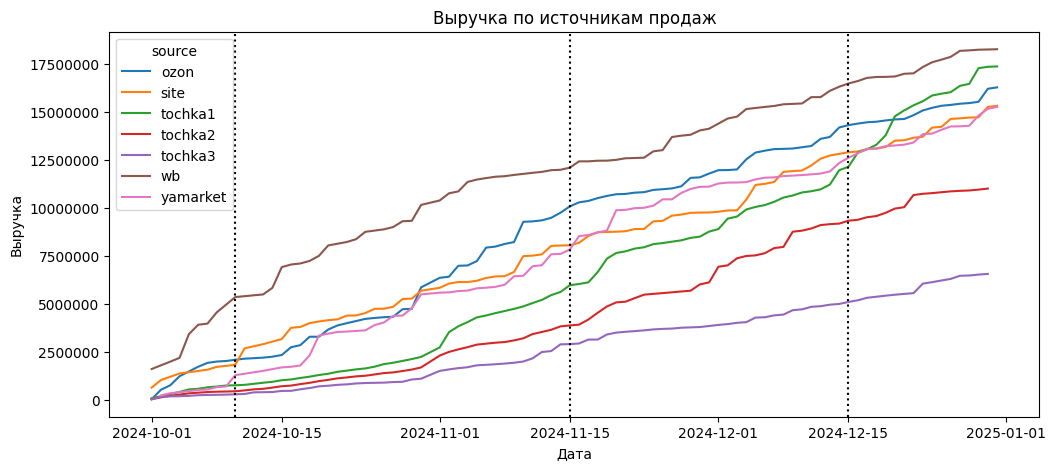

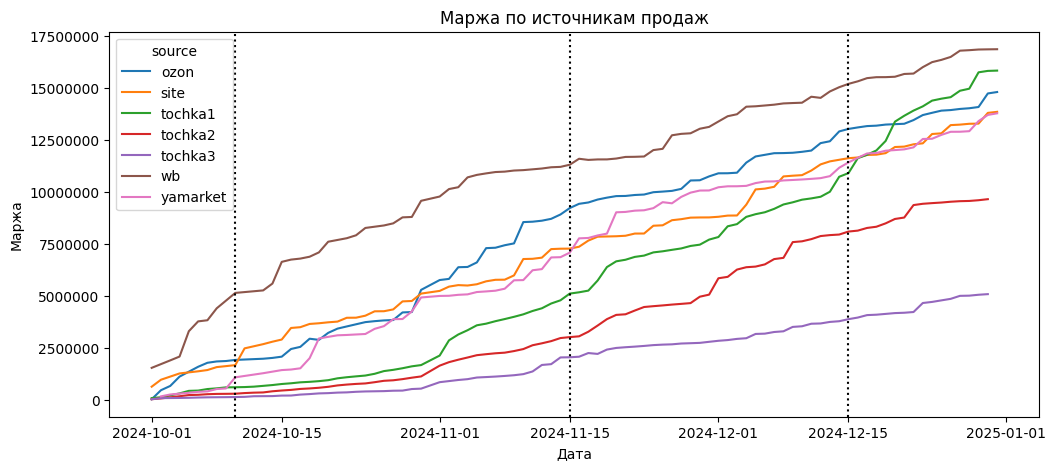

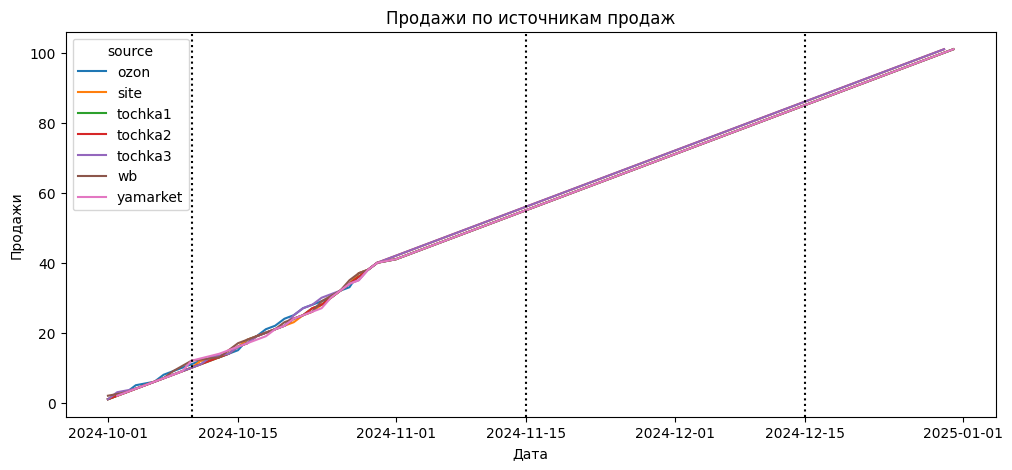

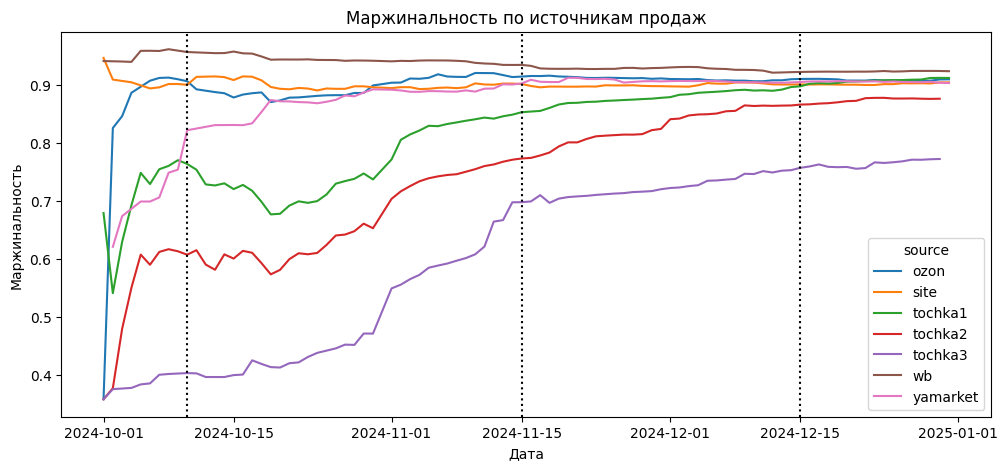

In [30]:
for i,c in enumerate(rev.columns[6:]):
    sns_chart(rev,c)

### Соцдем

#### Пол

In [9]:
df.groupby('Пол')['ID клиента'].nunique()

Пол
Ж    40
М    37
Name: ID клиента, dtype: int64

In [36]:
def total_group(dim):
    t_cols=['Дата','source', dim, 'Сумма покупки', 'Маржа', 'Артикул']
    t=df[t_cols].groupby(['source', dim], as_index=False, observed=True)['Сумма покупки'].sum().assign(dolya=lambda x: x['Сумма покупки']/x.groupby('source')['Сумма покупки'].transform('sum')).sort_values(['source',dim])
    return t 

total_group('Пол')

source Пол  Сумма покупки     dolya
0     site   Ж        5241510  0.480716
1     site   М        5662030  0.519284
2  tochka1   Ж        6835470  0.411231
3  tochka1   М        9786490  0.588769
4  tochka2   Ж        3405610  0.309190
5  tochka2   М        7609020  0.690810
6  tochka3   Ж        3623710  0.562519
7  tochka3   М        2818220  0.437481

In [11]:
def group(dim):
    t_dem=df.groupby(['Дата','source', dim], as_index=False, observed=True).agg(Выручка_=('Сумма покупки','sum'),Маржа_=('Маржа','sum'), Продажи_=('Артикул','count')).sort_values(['source',dim,'Дата'])
    t_dem['Выручка']=t_dem.groupby(['source',dim])['Выручка_'].cumsum()
    t_dem['Маржа']=t_dem.groupby(['source',dim])['Маржа_'].cumsum()
    t_dem['Продажи']=t_dem.groupby(['source',dim])['Продажи_'].cumsum()
    return t_dem
    
    # fin_dem['Выручка_сгл']=fin_dem.groupby(['source',dim])['Выручка'].transform(lambda x: x.rolling(7, min_periods=1).sum())
    # fin_dem['Маржа_сгл']=fin_dem.groupby(['source',dim])['Маржа'].transform(lambda x: x.rolling(7, min_periods=1).sum())
    # fin_dem['Продажи_сгл']=fin_dem.groupby(['source',dim])['Продажи'].transform(lambda x: x.rolling(7, min_periods=1).sum())
        
fin_dem=group('Пол')
fin_dem.head()
    

Дата source Пол  Выручка_  Маржа_  Продажи_  Выручка   Маржа  Продажи
3  2024-10-02   site   Ж    395560  335060         1   395560  335060        1
17 2024-10-06   site   Ж    131450  102850         2   527010  437910        3
21 2024-10-07   site   Ж     64900   61050         1   591910  498960        4
49 2024-10-15   site   Ж    131670  104170         1   723580  603130        5
57 2024-10-17   site   Ж     43560   37510         1   767140  640640        6

In [ ]:
### для динамических графиков
def chart(df,src, cols, dim ):
    fig_t=px.line(df.query(f"source=='{src}'"), x='Дата',y=cols, color=dim, title=f'{src}-{cols}')
    fig_t.add_vline('2024-10-10', line_dash='dot')        
    fig_t.add_vline('2024-11-15', line_dash='dot')
    fig_t.add_vline('2024-12-15', line_dash='dot')        
    fig_t.update_layout(template='plotly_dark', width=900, height=400, autosize=False,margin=dict(l=50, r=50, t=50, b=50) )

    file=f'./{dim}_{cols}_{src}.png'    
    # im=pio.write_image(fig_t,file, format='svg', scale=2, engine='kaleido' , width=900, height=300)
    im=pio.to_image(fig_t, format='png', scale=2,  width=900, height=400)
    with open(file, 'wb') as f:
        f.write(im)
    return fig_t.show()




In [41]:
for s in fin_dem['source'].unique():
    for c in fin_dem.columns[6:]:
        chart(fin_dem,s,c,'Пол')

b:\analyt_obuch\env311\Lib\site-packages\choreographer\utils\_tmpfile.py:137: TmpDirWarning:

The temporary directory could not be deleted, execution will continue. errors: [(WindowsPath('C:/Users/B52F~1/AppData/Local/Temp/tmps_wftw63/CrashpadMetrics-active.pma'), PermissionError(13, 'Отказано в доступе')), (WindowsPath('C:/Users/B52F~1/AppData/Local/Temp/tmps_wftw63'), OSError(41, 'Папка не пуста'))]

WARNING	Thread(Thread-385 (run)) choreographer.utils._tmpfile:_tmpfile.py:clean()- Temporary dictory couldn't be removed manually.


WARNING	Thread(Thread-391 (run)) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


b:\analyt_obuch\env311\Lib\site-packages\choreographer\utils\_tmpfile.py:137: TmpDirWarning:

The temporary directory could not be deleted, execution will continue. errors: [(WindowsPath('C:/Users/B52F~1/AppData/Local/Temp/tmpn9ci_g56/CrashpadMetrics-active.pma'), PermissionError(13, 'Отказано в доступе')), (WindowsPath('C:/Users/B52F~1/AppData/Local/Temp/tmpn9ci_g56'), OSError(41, 'Папка не пуста'))]

WARNING	Thread(Thread-393 (run)) choreographer.utils._tmpfile:_tmpfile.py:clean()- Temporary dictory couldn't be removed manually.


b:\analyt_obuch\env311\Lib\site-packages\choreographer\utils\_tmpfile.py:137: TmpDirWarning:

The temporary directory could not be deleted, execution will continue. errors: [(WindowsPath('C:/Users/B52F~1/AppData/Local/Temp/tmp4qve1yqy/CrashpadMetrics-active.pma'), PermissionError(13, 'Отказано в доступе')), (WindowsPath('C:/Users/B52F~1/AppData/Local/Temp/tmp4qve1yqy'), OSError(41, 'Папка не пуста'))]

WARNING	Thread(Thread-401 (run)) choreographer.utils._tmpfile:_tmpfile.py:clean()- Temporary dictory couldn't be removed manually.


WARNING	Thread(Thread-405 (run)) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


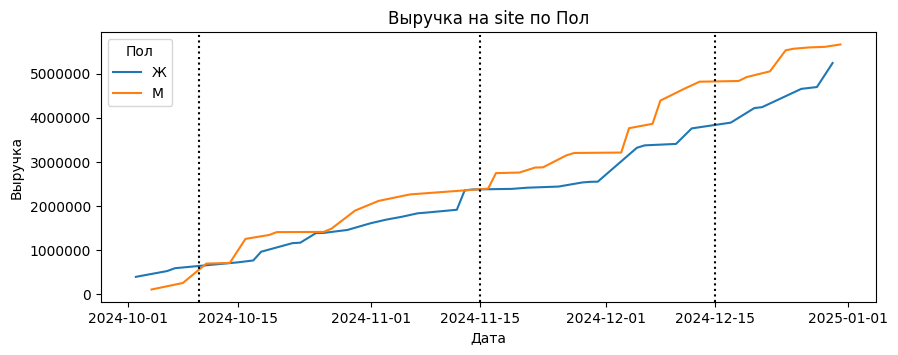

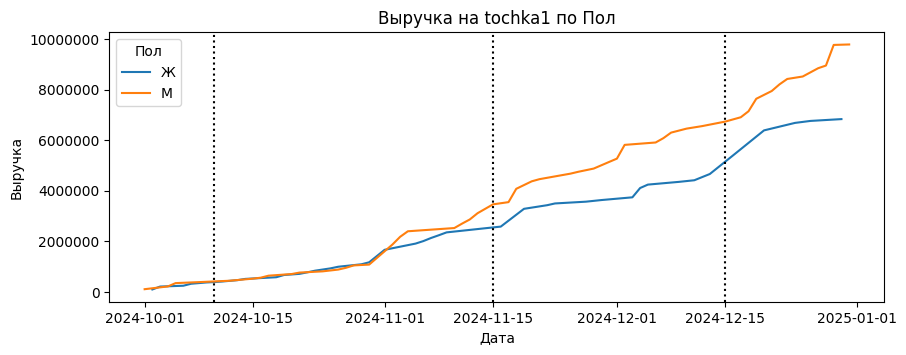

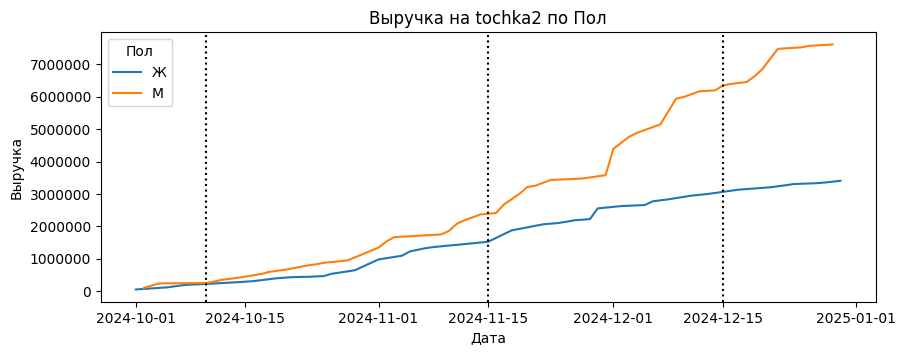

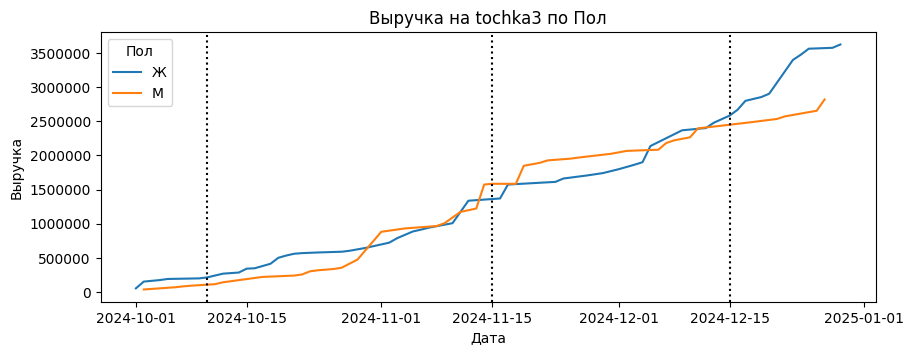

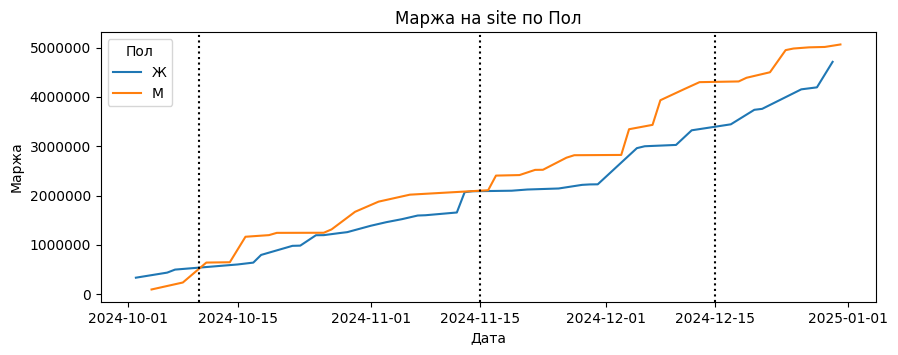

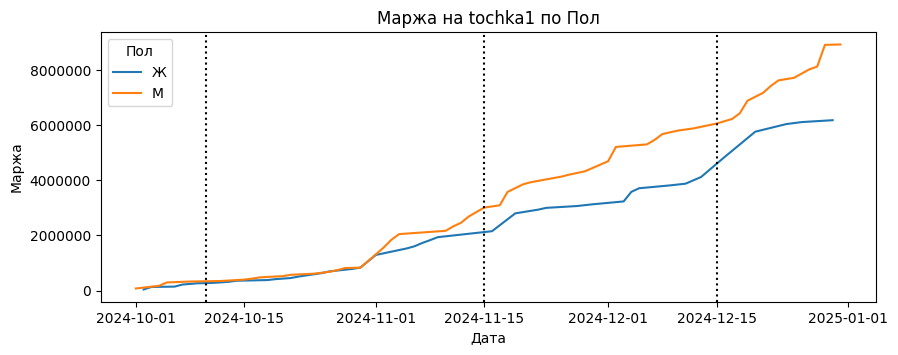

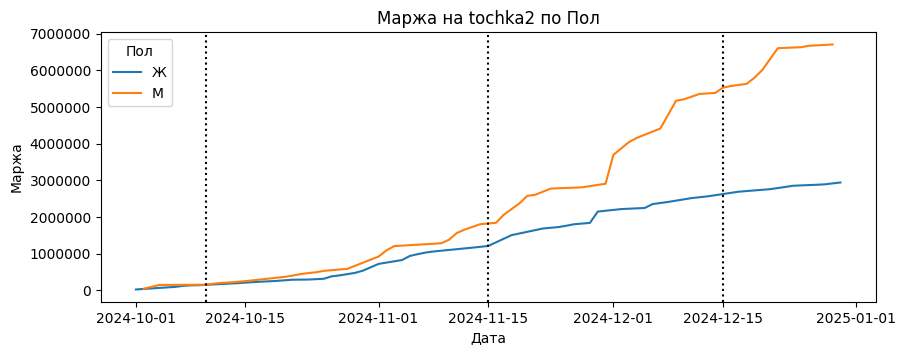

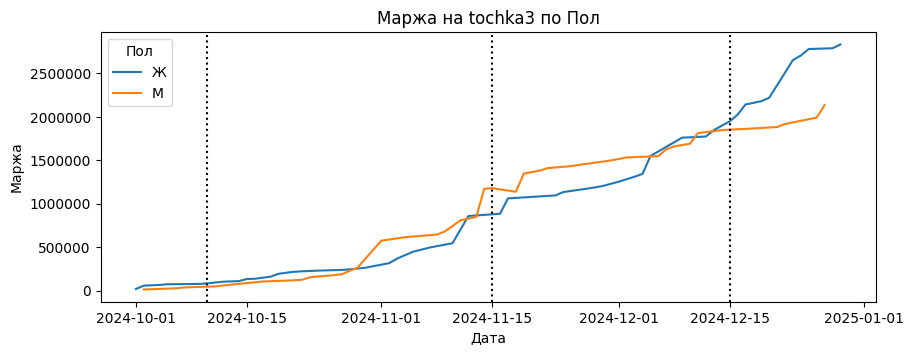

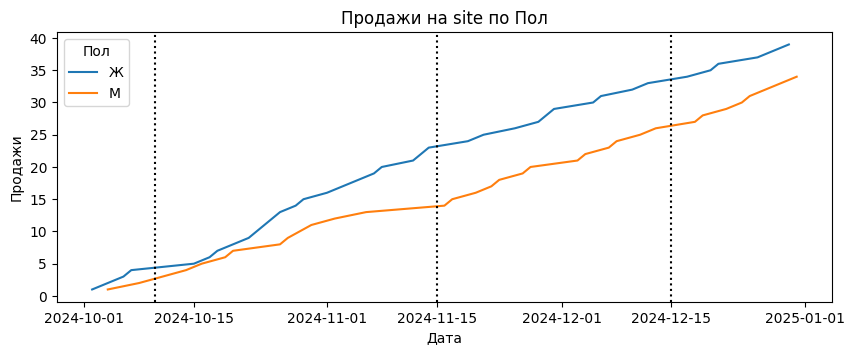

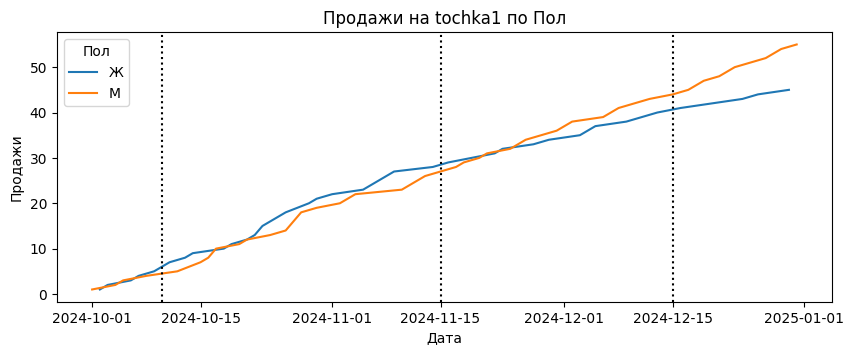

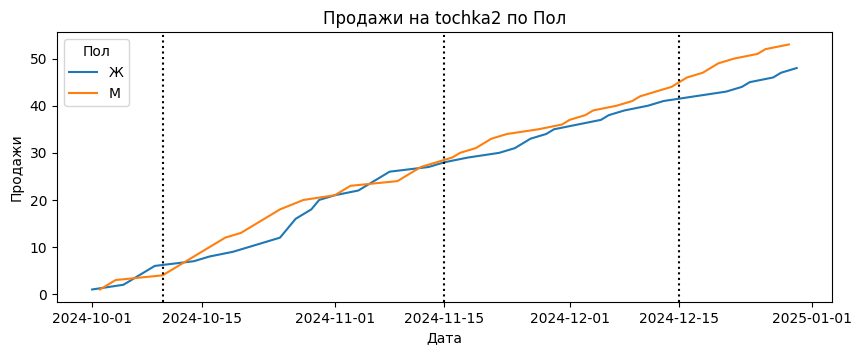

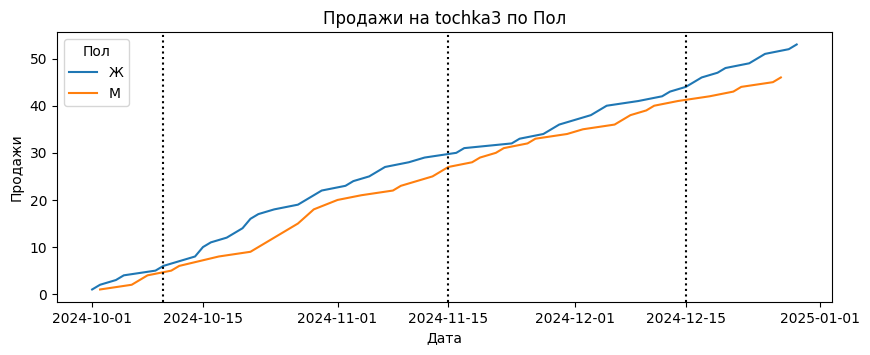

In [ ]:
def chart_dem_sns(t, col, src, dim):
    t_=t.query('source==@src')
    plt.figure(figsize=(10,3.5))
    plt.ticklabel_format(axis='y',style='plain')
    sns.lineplot(t_, x='Дата',y=col,hue=dim)
    plt.title(f'{c} на {s} по {dim}')
    plt.axvline(pd.to_datetime('2024-10-10'),color='black',linestyle=':')
    plt.axvline(pd.to_datetime('2024-11-15'), color='black',linestyle=':')
    plt.axvline(pd.to_datetime('2024-12-15'), color='black', linestyle=':')
    return plt.show()

for c in fin_dem.columns[6:]:
    for s in fin_dem['source'].unique():
        chart_dem_sns(fin_dem, c,s,'Пол')

#### Возраст

In [42]:

fin_vozr_tot=total_group('возраст_')
fin_vozr_tot

source возраст_  Сумма покупки     dolya
0       ozon   не_опр       16280960  1.000000
1       site   не_опр        4417430  0.288326
2       site    18-24        1924860  0.125636
3       site    25-34        3233120  0.211026
4       site    35-44        2478070  0.161744
5       site    45-54        2277720  0.148667
6       site      55+         989770  0.064602
7    tochka1   не_опр         747890  0.043057
8    tochka1      18-         628920  0.036208
9    tochka1    18-24        3181560  0.183166
10   tochka1    25-34        2238990  0.128901
11   tochka1    35-44        2421340  0.139399
12   tochka1    45-54        6381430  0.367385
13   tochka1      55+        1769720  0.101885
14   tochka2      18-         189800  0.017232
15   tochka2    18-24        3176360  0.288376
16   tochka2    25-34        1913720  0.173743
17   tochka2    35-44        2812630  0.255354
18   tochka2    45-54        1793760  0.162852
19   tochka2      55+        1128360  0.102442
20   tochka3   не_опр         133430  0.020292
21   tochka3      18-          12990  0.001976
22   tochka3    18-24        1549320  0.235625
23   tochka3    25-34        1289440  0.196102
24   tochka3    35-44        1362890  0.207272
25   tochka3    45-54        1246810  0.189619
26   tochka3      55+         980480  0.149114
27        wb   не_опр       18265510  1.000000
28  yamarket   не_опр       15263000  1.000000

In [43]:
fin_vozr=group('возраст_')
display(fin_vozr.info())

display(pd.crosstab(df['Пол'], df['возраст_']))
for s in fin_vozr['source'].unique() :
    if s in ['tochka1','tochka2','tochka3','site']:
        for c in fin_vozr.columns[6:]:
            chart(fin_vozr,s, c,'возраст_')
    #break
# df.groupby(['Дата','source','возраст_'],as_index=False, observed=True).agg(Выручка_=('Сумма покупки','sum'),Маржа_=('Маржа','sum'), Продажи_=('Артикул','count')).sort_values(['source','возраст_','Дата'])

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 656
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Дата      657 non-null    datetime64[ns]
 1   source    657 non-null    object        
 2   возраст_  657 non-null    category      
 3   Выручка_  657 non-null    int64         
 4   Маржа_    657 non-null    int64         
 5   Продажи_  657 non-null    int64         
 6   Выручка   657 non-null    int64         
 7   Маржа     657 non-null    int64         
 8   Продажи   657 non-null    int64         
dtypes: category(1), datetime64[ns](1), int64(6), object(1)
memory usage: 47.2+ KB


C:\Users\Рин\AppData\Local\Temp\ipykernel_2668\3870849832.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Рин\AppData\Local\Temp\ipykernel_2668\3870849832.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Рин\AppData\Local\Temp\ipykernel_2668\3870849832.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



None

возраст_  18-  18-24  25-34  35-44  45-54  55+
Пол                                           
Ж           5     37     68     46     29    0
М           0     36     22     34     57   39

WARNING	Thread(Thread-411 (run)) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


WARNING	Thread(Thread-413 (run)) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


WARNING	Thread(Thread-415 (run)) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


b:\analyt_obuch\env311\Lib\site-packages\choreographer\utils\_tmpfile.py:137: TmpDirWarning:

The temporary directory could not be deleted, execution will continue. errors: [(WindowsPath('C:/Users/B52F~1/AppData/Local/Temp/tmpfi1rro47/CrashpadMetrics-active.pma'), PermissionError(13, 'Отказано в доступе')), (WindowsPath('C:/Users/B52F~1/AppData/Local/Temp/tmpfi1rro47'), OSError(41, 'Папка не пуста'))]

WARNING	Thread(Thread-417 (run)) choreographer.utils._tmpfile:_tmpfile.py:clean()- Temporary dictory couldn't be removed manually.


WARNING	Thread(Thread-425 (run)) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


In [46]:
fin_vozr.head()

Дата source возраст_  Выручка_  Маржа_  Продажи_  Выручка    Маржа  \
0  2024-10-01   ozon   не_опр     54890   19690         1    54890    19690   
6  2024-10-02   ozon   не_опр    494450  433950         1   549340   453640   
13 2024-10-03   ozon   не_опр    230340  206140         1   779680   659780   
18 2024-10-04   ozon   не_опр    470470  448470         2  1250150  1108250   
30 2024-10-06   ozon   не_опр    493350  473550         1  1743500  1581800   

    Продажи  
0         1  
6         2  
13        3  
18        5  
30        6

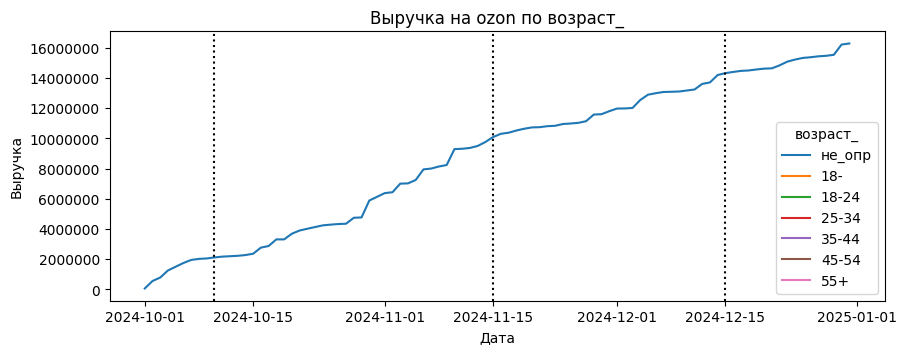

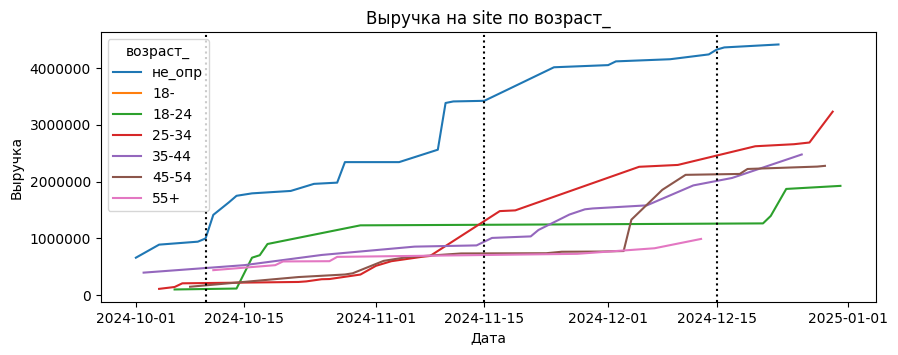

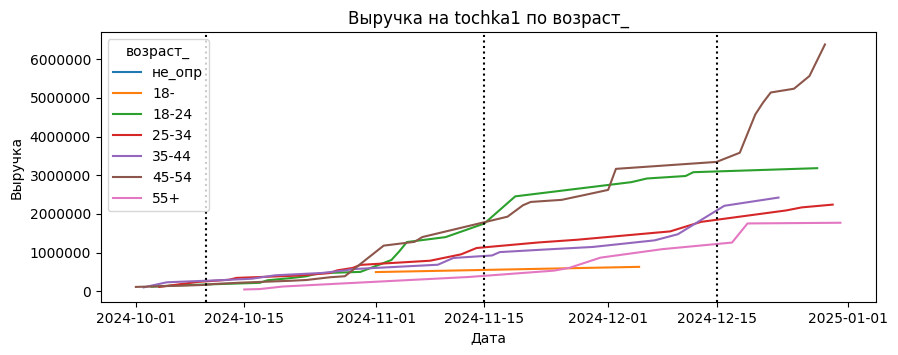

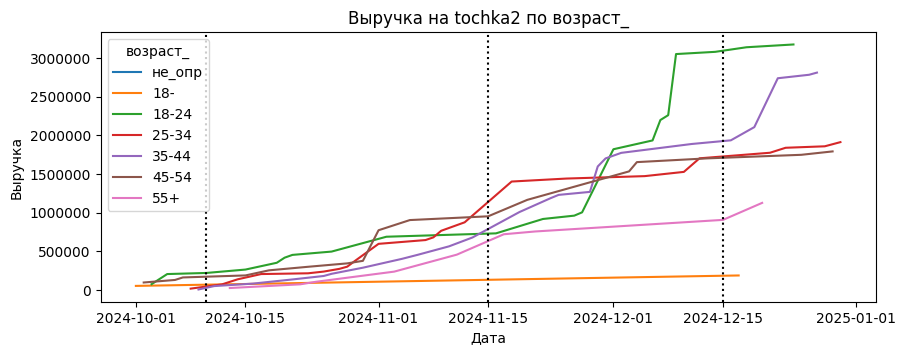

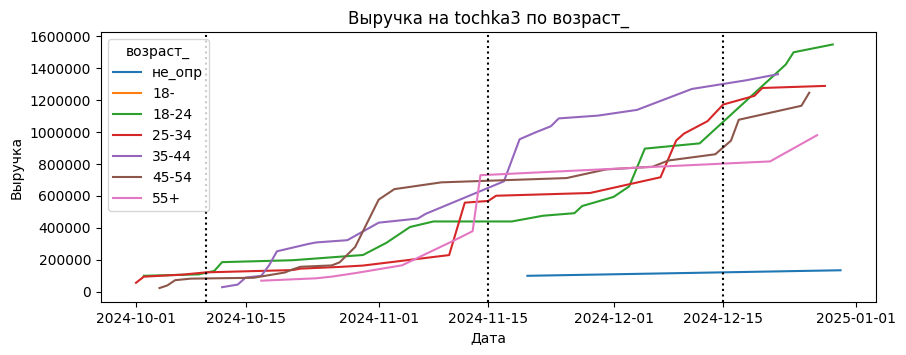

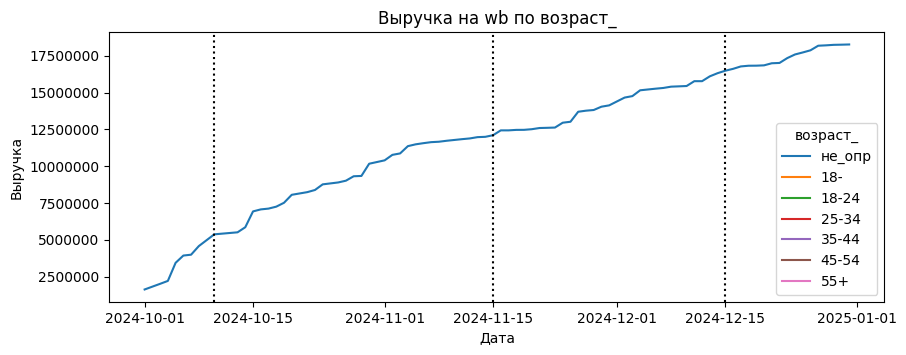

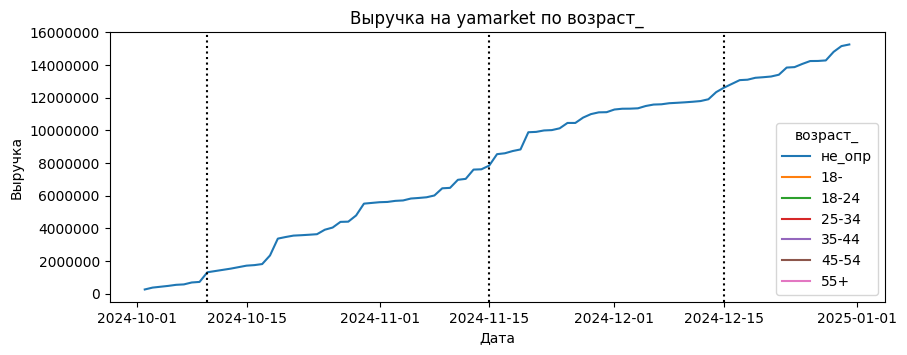

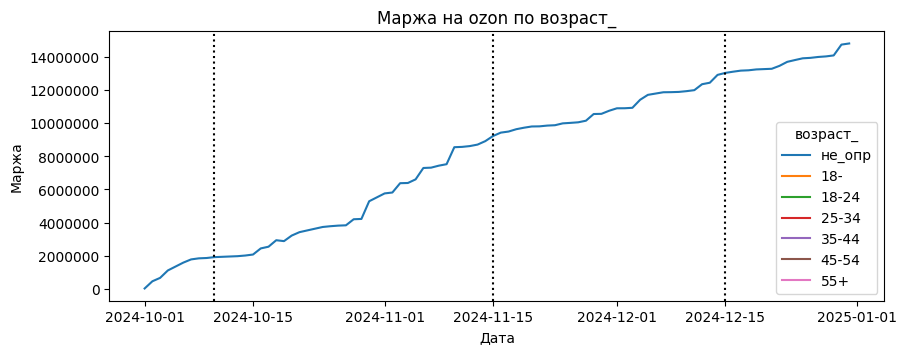

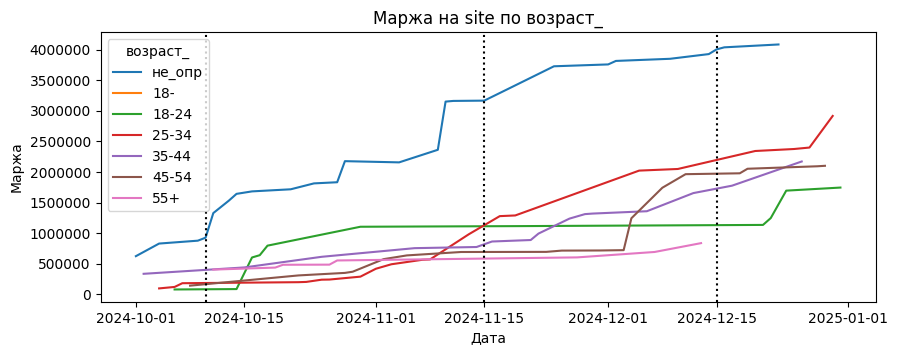

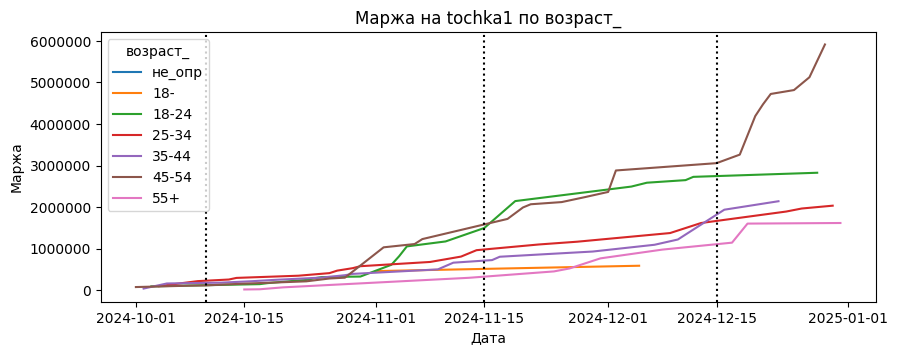

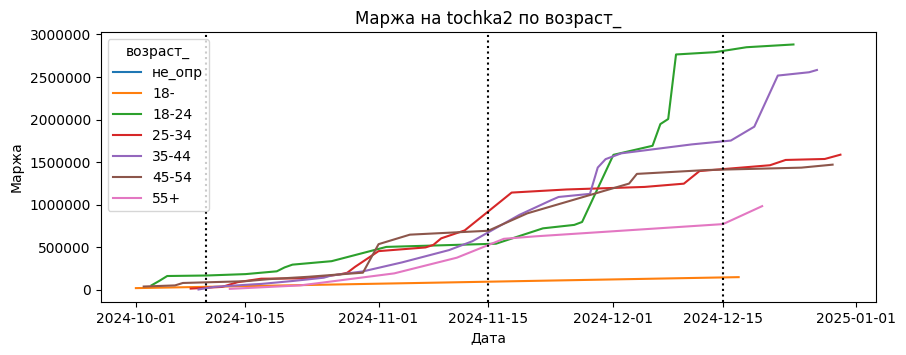

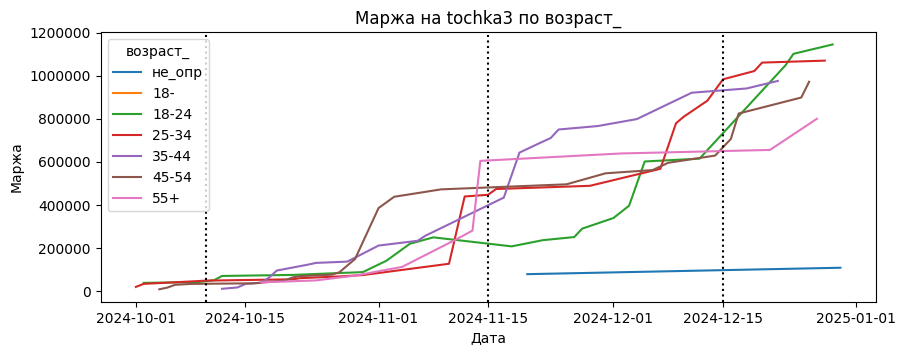

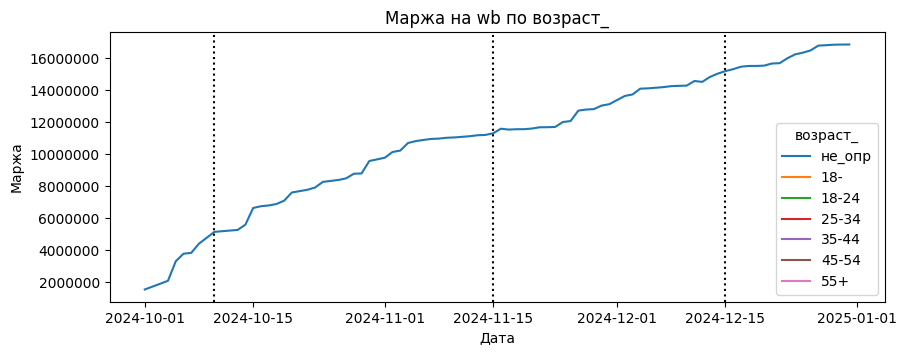

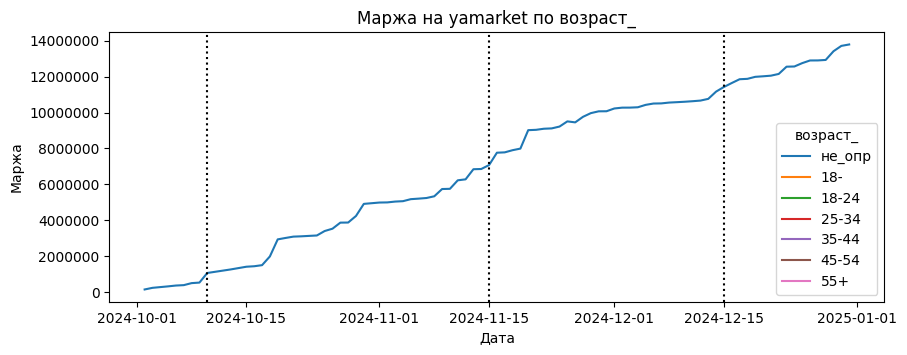

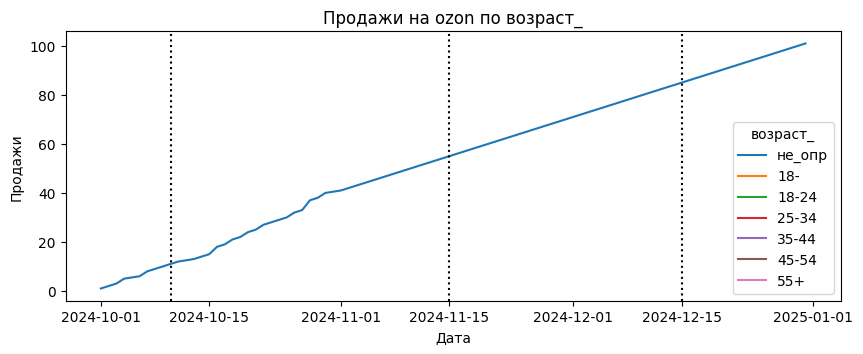

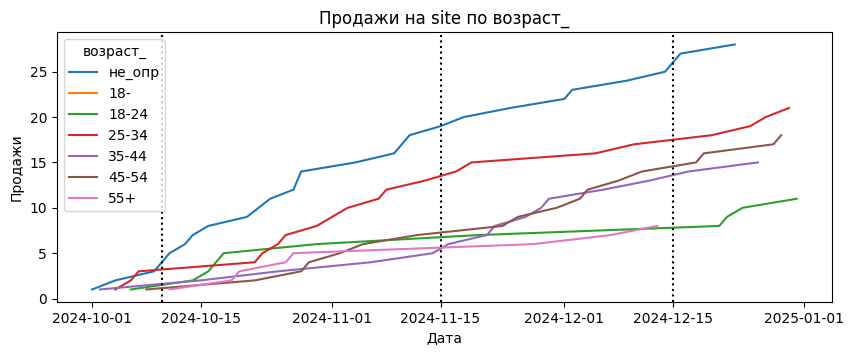

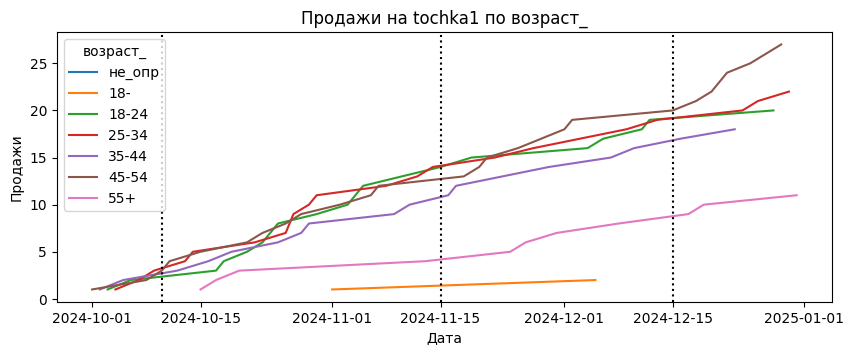

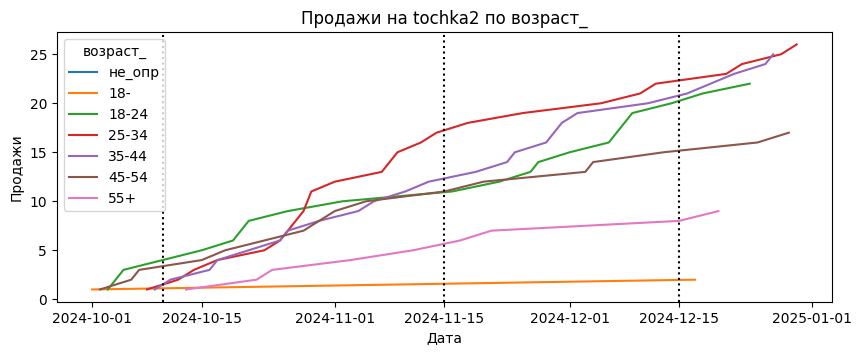

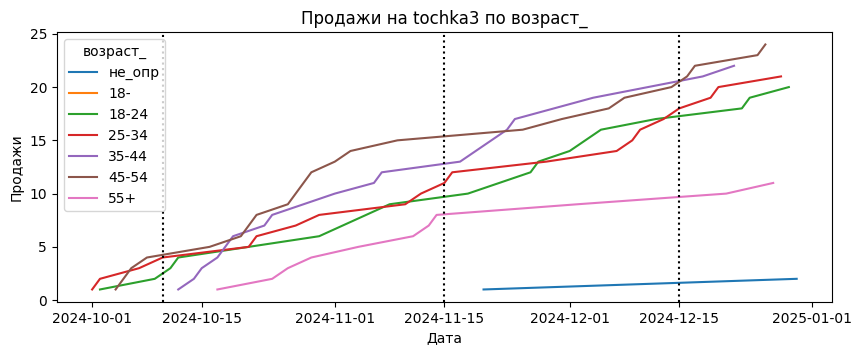

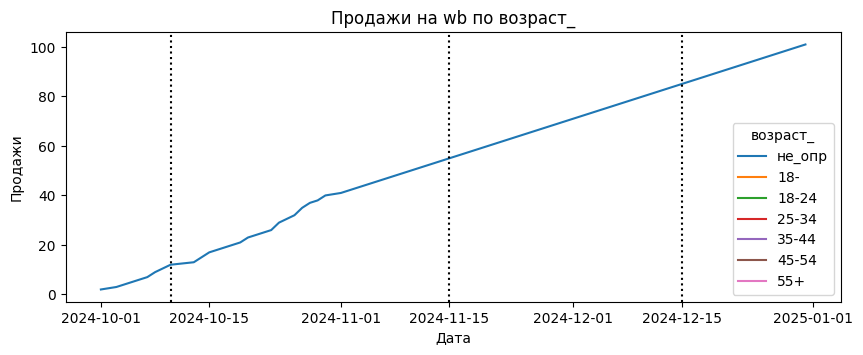

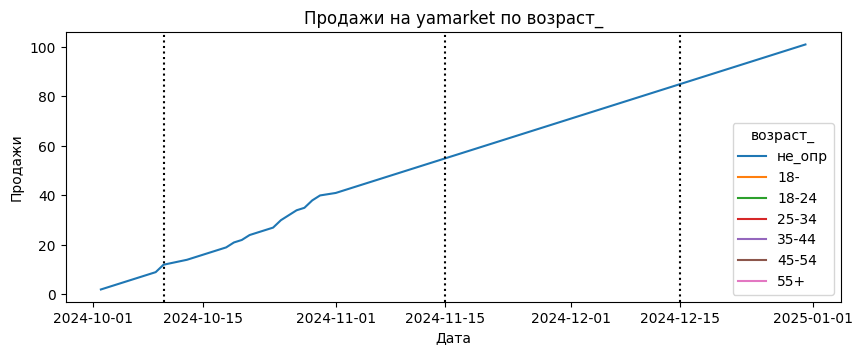

In [52]:
for c in fin_vozr.columns[6:]:
    for s in fin_vozr['source'].unique():
        chart_dem_sns(fin_vozr,c,s,'возраст_')